In [1]:
import numpy as np
import NN_functions as nuf
f=np.load("/home/amorelli/r_estimate/B_maps_white_noise/results_29_6_23/check_r_distribution.npz")
y_val=f["y_val"]
y_train=f["y_train"]
f_pred=np.load("/home/amorelli/r_estimate/B_maps_white_noise/results_29_6_23/predictions.npz")
norm=f_pred["norm"]

2023-06-30 23:07:50.792914: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-30 23:07:52.021994: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-06-30 23:07:52.022121: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-06-30 23:07:52.022138: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

print(y_val.shape)
print(y_train.shape)
print(np.min(y_train))
print(y_train[:200])

print(y_val[:100])

In [2]:
import matplotlib.pyplot as plt
#print(y_val[:100])

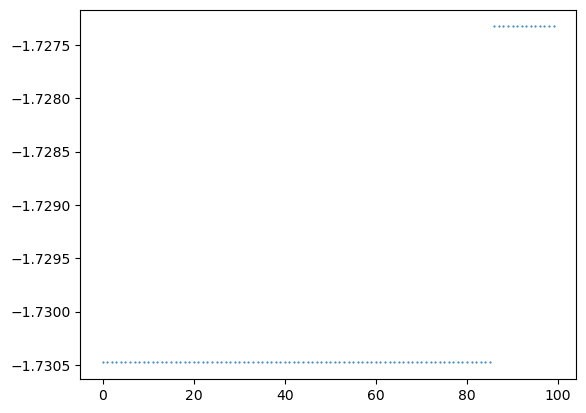

In [3]:
plt.plot(range(len(y_train[:100])),y_train[:100],linestyle='None',marker='.', markersize = 1.0)

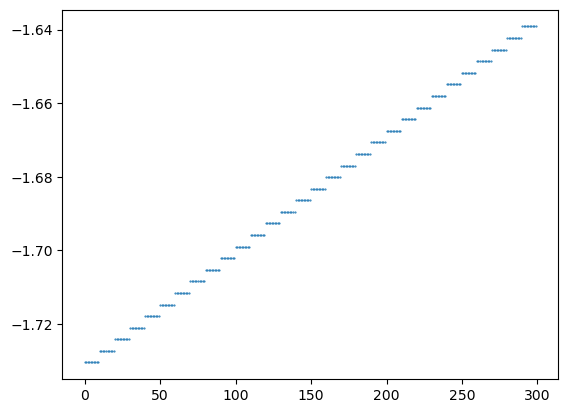

In [4]:
plt.plot(range(len(y_val[:300])),y_val[:300],linestyle='None',marker='.', markersize = 1.0)

In [5]:
def check_y(y_train):
    y_train=np.sort(y_train,axis=0)
    y_count=[]
    y_red=[]
    prev_index=0
    for i in range(1,len(y_train)):
        if y_train[i] != y_train[i-1]:
            y_count.append(i-prev_index)
            prev_index=i
            y_red.append(y_train[i-1])
        else:
            pass
    return y_count, y_red
y_count, y_red = check_y(y_train) 
y_count2, y_red2 = check_y(y_val)

[-1.73047693] [-1.72732775]
86 87
1100


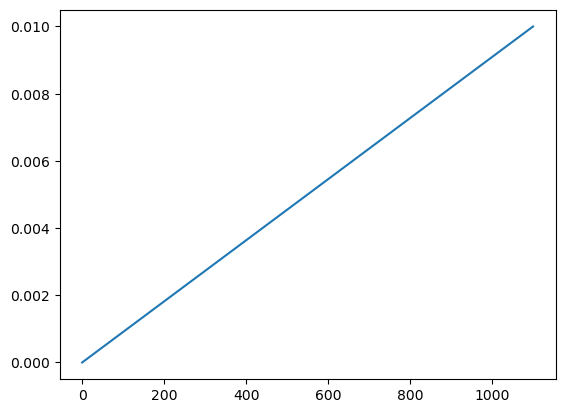

In [6]:
print(y_red[0],y_red[1])
print(y_count[0],y_count[1])
print(len(norm))
plt.plot(range(len(norm)),norm)

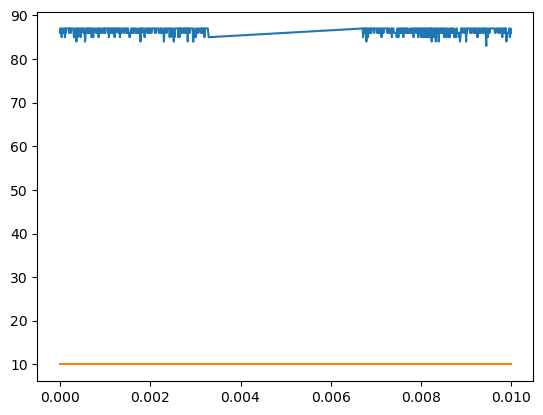

In [7]:
#print(y_red)
y_red=nuf.denormalize_data(np.asarray(y_red).flatten(),norm)
y_red2=nuf.denormalize_data(np.asarray(y_red2).flatten(),norm)
plt.plot(y_red,y_count)
plt.plot(y_red2,y_count2)

In [ ]:
print(y_count[:10])
print(y_train[:400])

In [ ]:
y_count_v=[]
y_red_v=[]
prev_index=0
for i in range(1,len(y_val)):
    if y_val[i] != y_val[i-1]:
        y_count_v.append(i-prev_index)
        prev_index=i
        y_red_v.append(y_val[i-1])
    else:
        pass
plt.plot(y_red_v,y_count_v)